In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math
import re

In [2]:
city_pairs = pd.read_csv("city_pairs.csv")


def passenger_in_out_same(row):
    if row.Passengers_In > row.Passengers_Out:
        return 'IN'
    elif row.Passengers_In < row.Passengers_Out:
        return 'OUT'
    else:
        return 'SAME'


def freight_in_out_same(Freight_In, Freight_Out):
    if Freight_In > Freight_Out:
        return 'IN'
    elif Freight_In < Freight_Out:
        return 'OUT'
    else:
        return 'SAME'


def mail_in_out_same(Mail_In, Mail_Out):
    if Mail_In > Mail_Out:
        return 'IN'
    elif Mail_In < Mail_Out:
        return 'OUT'
    else:
        return 'SAME'


city_pairs['passenger_in_out'] = city_pairs.apply(passenger_in_out_same, axis=1)
city_pairs['freight_in_out'] = city_pairs.apply(
    lambda x: freight_in_out_same(x['Freight_In_(tonnes)'], x['Freight_Out_(tonnes)']), axis=1)
city_pairs['mail_in_out'] = city_pairs.apply(
    lambda x: freight_in_out_same(x['Mail_In_(tonnes)'], x['Mail_Out_(tonnes)']), axis=1)
df_1 = city_pairs[["AustralianPort", "ForeignPort", "passenger_in_out", "freight_in_out", "mail_in_out"]]

In [3]:
df_1.columns = ["AustralianPort", "ForeignPort", "passenger_in_out_1", "freight_in_out_1", "mail_in_out_1"]

PassengerInCount = df_1.groupby(["AustralianPort", city_pairs['passenger_in_out'] == 'IN'])[
    'passenger_in_out_1'].count().unstack(fill_value=0).stack().reset_index()
df_2 = PassengerInCount[PassengerInCount['passenger_in_out'] == True]
PassengerInCount = df_2[['AustralianPort', 0]]
PassengerInCount.columns = ['AustralianPort', 'PassengerInCount']

PassengerOutCount = df_1.groupby(["AustralianPort", city_pairs['passenger_in_out'] == 'OUT'])[
    'passenger_in_out_1'].count().unstack(fill_value=0).stack().reset_index()
df_2 = PassengerOutCount[PassengerOutCount['passenger_in_out'] == True]
PassengerOutCount = df_2[['AustralianPort', 0]]
PassengerOutCount.columns = ['AustralianPort', 'PassengerOutCount']

FreightInCount = df_1.groupby(["AustralianPort", city_pairs['freight_in_out'] == 'IN'])[
    'freight_in_out_1'].count().unstack(fill_value=0).stack().reset_index()
df_2 = FreightInCount[FreightInCount['freight_in_out'] == True]
FreightInCount = df_2[['AustralianPort', 0]]
FreightInCount.columns = ['AustralianPort', 'FreightInCount']

FreightOutCount = df_1.groupby(["AustralianPort", city_pairs['freight_in_out'] == 'OUT'])[
    'freight_in_out_1'].count().unstack(fill_value=0).stack().reset_index()
df_2 = FreightOutCount[FreightOutCount['freight_in_out'] == True]
FreightOutCount = df_2[['AustralianPort', 0]]
FreightOutCount.columns = ['AustralianPort', 'FreightOutCount']

MailInCount = df_1.groupby(["AustralianPort", city_pairs['mail_in_out'] == 'IN'])['mail_in_out_1'].count().unstack(
    fill_value=0).stack().reset_index()
df_2 = MailInCount[MailInCount['mail_in_out'] == True]
MailInCount = df_2[['AustralianPort', 0]]
MailInCount.columns = ['AustralianPort', 'MailInCount']

MailOutCount = df_1.groupby(["AustralianPort", city_pairs['mail_in_out'] == 'OUT'])['mail_in_out_1'].count().unstack(
    fill_value=0).stack().reset_index()
df_2 = MailOutCount[MailOutCount['mail_in_out'] == True]
MailOutCount = df_2[['AustralianPort', 0]]
MailOutCount.columns = ['AustralianPort', 'MailInCount']

df = PassengerInCount.merge(PassengerOutCount, how='left', on='AustralianPort').merge(FreightInCount, how='left',
                                                                                      on='AustralianPort').merge(
    FreightOutCount, how='left', on='AustralianPort').merge(MailInCount, how='left', on='AustralianPort').merge(
    MailOutCount, how='left', on='AustralianPort')
df.columns = ['AustralianPort', 'PassengerInCount', 'PassengerOutCount', 'FreightInCount', 'FreightOutCount',
              'MailInCount', 'MailOutCount']
df.sort_values('PassengerInCount', ascending=False)


,AustralianPort,PassengerInCount,PassengerOutCount,FreightInCount,FreightOutCount,MailInCount,MailOutCount
16,Sydney,10548,10994,12493,9112,9664,7225
10,Melbourne,7939,7311,7248,7591,6043,4457
1,Brisbane,6837,6686,3970,7201,2580,5348
13,Perth,4704,3604,2736,4341,2771,3671
3,Cairns,2986,3639,1585,3233,538,1553
0,Adelaide,2882,2718,1468,2462,490,1704
6,Darwin,2072,1889,1639,1194,341,717
7,Gold Coast,555,460,559,295,125,135
18,Townsville,293,332,94,212,0,1
8,Gold Coast/Coolangatta,291,211,55,27,0,0


In [4]:

#city_pairs['Country'].drop_duplicates()


df_6 = city_pairs.groupby("Country")['Passengers_In'].sum()
df_avg = {'Country': df_6.index, 'Passengers_in_average': df_6.values}
df_avg = pd.DataFrame(df_avg)
years = (city_pairs['Year'].max() - city_pairs['Year'].min() + 1) * 12
#df_avg['Passengers_in_average'] = df_avg['Passengers_in_average'].apply(lambda x: x / years)
df_avg = df_avg.sort_values('Passengers_in_average', ascending=True)

# df_in_sum = city_pairs.groupby("Country")['Passengers_Out'].sum()
# Passengers_out_average = {'Country': df_in_sum.index, 'Passengers_out_average': df_in_sum.values}
# Passengers_out_average = pd.DataFrame(Passengers_out_average)
# Passengers_out_average['Passengers_out_average'] = Passengers_out_average['Passengers_out_average'].apply(
#     lambda x: x / years)
#
# df_Freight_in_average = city_pairs.groupby("Country")['Freight_In_(tonnes)'].sum()
# Freight_in_average = {'Country': df_Freight_in_average.index, 'Freight_in_average': df_Freight_in_average.values}
# Freight_in_average = pd.DataFrame(Freight_in_average)
# Freight_in_average['Freight_in_average'] = Freight_in_average['Freight_in_average'].apply(lambda x: x / years)
#
# df_Freight_out_average = city_pairs.groupby("Country")['Freight_Out_(tonnes)'].sum()
# Freight_out_average = {'Country': df_Freight_out_average.index, 'Freight_out_average': df_Freight_out_average.values}
# Freight_out_average = pd.DataFrame(Freight_out_average)
# Freight_out_average['Freight_out_average'] = Freight_out_average['Freight_out_average'].apply(lambda x: x / years)
#
# df_Mail_in_average = city_pairs.groupby("Country")['Mail_In_(tonnes)'].sum()
# Mail_in_average = {'Country': df_Mail_in_average.index, 'Mail_in_average': df_Mail_in_average.values}
# Mail_in_average = pd.DataFrame(Mail_in_average)
# Mail_in_average['Mail_in_average'] = Mail_in_average['Mail_in_average'].apply(lambda x: x / years)
#
# df_Mail_out_average = city_pairs.groupby("Country")['Mail_Out_(tonnes)'].sum()
# Mail_out_average = {'Country': df_Mail_out_average.index, 'Mail_out_average': df_Mail_out_average.values}
# Mail_out_average = pd.DataFrame(Mail_out_average)
# Mail_out_average['Mail_out_average'] = Mail_out_average['Mail_out_average'].apply(lambda x: x / years)
#
# df = df_avg.merge(Passengers_out_average, how='left', on='Country').merge(Freight_in_average, how='left',
#                                                                           on='Country').merge(Freight_out_average,
#                                                                                               how='left',
#                                                                                               on='Country').merge(
#     Mail_in_average, how='left', on='Country').merge(Mail_out_average, how='left', on='Country')
# df



In [5]:
# df_6 = city_pairs.groupby("Country")['Passengers_In'].sum()
# df_avg = {'Country': df_6.index, 'Passengers_in_average': df_6.values}
# df_avg = pd.DataFrame(df_avg)
# years = (city_pairs['Year'].max() - city_pairs['Year'].min() + 1) * 12
# #df_avg['Passengers_in_average'] = df_avg['Passengers_in_average'].apply(lambda x: x / years)
# df_avg = df_avg.sort_values('Passengers_in_average', ascending=True)
df_6=pd.pivot_table(city_pairs,index=['Country','Year'],values=['Passengers_In','Month_num'],aggfunc={'Passengers_In':'sum','Month_num':'count'}).reset_index()
df_6=pd.pivot_table(df_6,index=['Country'],values=['Passengers_In','Month_num'],aggfunc={'Passengers_In':'sum','Month_num':'sum'}).reset_index()

In [22]:
#city_pairs['Month']=city_pairs['Month'].apply(lambda x:x.split('-')[0])
df = city_pairs[city_pairs['Passengers_Out'] > 0].groupby(['AustralianPort', 'Country', 'Year', 'Month_num']).agg(
    Count=('ForeignPort', 'count')).reset_index()

df = df[df['Count'] > 1]

df4 = df.groupby(['Country'])['Count'].sum().reset_index()
df4

,Country,Count
0,Canada,700
1,Chile,18
2,China,860
3,Fiji,245
4,India,59
5,Indonesia,1887
6,Italy,20
7,Japan,1336
8,Malaysia,240
9,New Zealand,2145


In [7]:
city_pairs

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,passenger_in_out,freight_in_out,mail_in_out
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1,IN,IN,OUT
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1,IN,OUT,SAME
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1,IN,SAME,SAME
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1,OUT,IN,OUT
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1,IN,OUT,OUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84459,Sep-22,Sydney,Tokyo,Japan,9135,558.638,59.308,10573,659.217,29.100,19708,1217.855,88.408,2022,9,OUT,OUT,IN
84460,Sep-22,Sydney,Vancouver,Canada,11790,263.357,15.870,11410,339.741,55.791,23200,603.098,71.661,2022,9,IN,OUT,OUT
84461,Sep-22,Sydney,Wellington,New Zealand,8329,1.130,0.000,9258,4.521,0.000,17587,5.651,0.000,2022,9,OUT,OUT,SAME
84462,Sep-22,Sydney,Xiamen,China,1328,71.583,0.299,969,99.013,0.000,2297,170.596,0.299,2022,9,IN,OUT,IN


In [8]:
seats_csv = pd.read_csv('seats.csv')


def s_d_city_I(row):
    if row.In_Out == 'I':
        return 'International_City'
    else:
        return 'Australian_City'


def s_d_city_O(x):
    if x.In_Out == 'O':
        return 'International_City'
    else:
        return 'Australian_City'


seats_csv['Source_City'] = seats_csv.apply(s_d_city_I, axis=1)
seats_csv['Destination_City'] = seats_csv.apply(s_d_city_O, axis=1)
seats_csv[seats_csv['Airline'] == 'Aerolineas Argentinas']

,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num,Source_City,Destination_City
166,Sep-03,I,Sydney,Auckland,Aerolineas Argentinas,BUE-AKL-SYD,New Zealand,New Zealand,Argentina,S America,0,8,1976,2003,9,International_City,Australian_City
187,Sep-03,I,Sydney,Buenos Aires,Aerolineas Argentinas,BUE-AKL-SYD,Argentina,S America,Argentina,S America,1,8,1976,2003,9,International_City,Australian_City
454,Sep-03,O,Sydney,Auckland,Aerolineas Argentinas,SYD-AKL-BUE,New Zealand,New Zealand,Argentina,S America,0,8,1976,2003,9,Australian_City,International_City
474,Sep-03,O,Sydney,Buenos Aires,Aerolineas Argentinas,SYD-AKL-BUE,Argentina,S America,Argentina,S America,1,8,1976,2003,9,Australian_City,International_City
756,Dec-03,I,Sydney,Auckland,Aerolineas Argentinas,BUE-AKL-SYD,New Zealand,New Zealand,Argentina,S America,0,13,3211,2003,12,International_City,Australian_City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61536,Feb-14,O,Sydney,Buenos Aires,Aerolineas Argentinas,SYD-BUE,Argentina,S America,Argentina,S America,0,13,3211,2014,2,Australian_City,International_City
61819,Mar-14,I,Sydney,Buenos Aires,Aerolineas Argentinas,BUE-SYD,Argentina,S America,Argentina,S America,0,12,2964,2014,3,International_City,Australian_City
62097,Mar-14,O,Sydney,Buenos Aires,Aerolineas Argentinas,SYD-BUE,Argentina,S America,Argentina,S America,0,12,2964,2014,3,Australian_City,International_City
62374,Apr-14,I,Sydney,Buenos Aires,Aerolineas Argentinas,BUE-SYD,Argentina,S America,Argentina,S America,0,1,247,2014,4,International_City,Australian_City


In [9]:
# seats_csv.groupby(['Airline','Year','Australian_City','International_City']).agg(Sum=('All_Flights','sum')).reset_index()
pd.pivot_table(seats_csv, index=['Airline', 'Year', 'Australian_City', 'International_City'],
               values=['All_Flights', 'Max_Seats'], aggfunc='sum').sort_values(['Airline', 'Year'], ascending=[True,
                                                                                                               False])  #.reset_index().sort_values(['Year','Airline','International_City'],ascending=[True,False,False])

All_Flights  \
Airline               Year Australian_City International_City                
Aerolineas Argentinas 2014 Sydney          Buenos Aires                 82   
                      2013 Sydney          Buenos Aires                316   
                      2012 Sydney          Auckland                    156   
                                           Buenos Aires                310   
                      2011 Sydney          Auckland                    308   
...                                                                    ...   
Xiamen Airlines       2016 Melbourne       Xiamen                      114   
                           Sydney          Fuzhou                      314   
                                           Xiamen                      259   
                      2015 Sydney          Fuzhou                       29   
                                           Xiamen                       16   

                                                               Max_Seats  
Airline               Year Australian_City International_City             
Aerolineas Argentinas 2014 Sydney          Buenos Aires            20254  
                      2013 Sydney          Buenos Aires            78052  
                      2012 Sydney          Auckland                38532  
                                           Buenos Aires            76570  
                      2011 Sydney          Auckland                76076  
...                                                                  ...  
Xiamen Airlines       2016 Melbourne       Xiamen                  26866  
                           Sydney          Fuzhou                  74104  
                                           Xiamen                  61124  
                      2015 Sydney          Fuzhou                   6844  
                                           Xiamen                   3776  

[5742 rows x 2 columns]

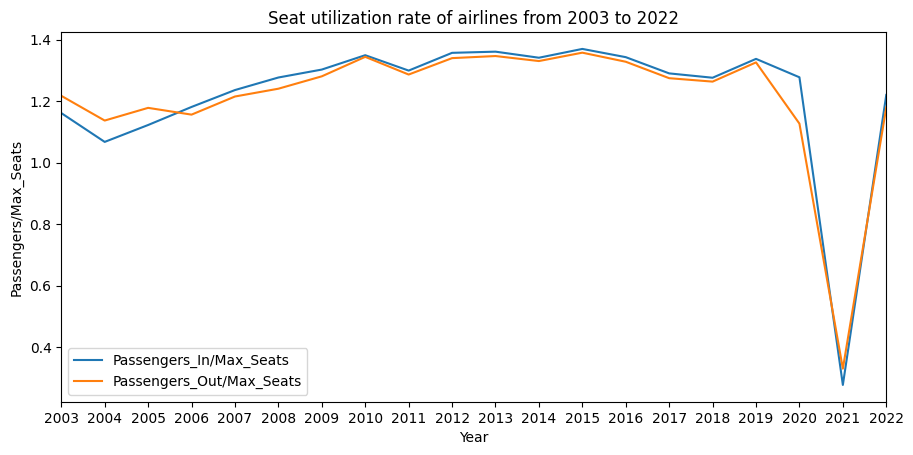

In [10]:
df_city = city_pairs[['Year', 'Month_num', 'Passengers_In', 'Passengers_Out']]
df_city = df_city[df_city['Passengers_In'] > 0]
df_city = df_city[df_city['Passengers_Out'] > 0]
df_seats = seats_csv[['Year', 'Month_num', 'Port_Region', 'Max_Seats']]
df_all = df_seats.merge(df_city, how='left', on=['Year', 'Month_num'])
df_all = pd.pivot_table(df_all, index=['Year'], values=['Max_Seats', 'Passengers_In', 'Passengers_Out'], aggfunc='sum')
df_all['InSeatsPercent'] = df_all.apply(lambda x: (x['Passengers_In'] / x['Max_Seats']), axis=1)
df_all['OutSeatsPercent'] = df_all.apply(lambda x: (x['Passengers_Out'] / x['Max_Seats']), axis=1)
df_all = df_all.reset_index().sort_values('Year',ascending=True)
x = df_all['Year']
y1 = df_all['InSeatsPercent']
y2 = df_all['OutSeatsPercent']
plt.plot(x, y1, label='Passengers_In/Max_Seats')
plt.plot(x, y2, label='Passengers_Out/Max_Seats')

plt.legend()
plt.title('Seat utilization rate of airlines from 2003 to 2022')
plt.xlabel("Year")
plt.ylabel("Passengers/Max_Seats")
plt.xticks(x)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
maxsize = 50
m = 1
N = len(x)
s = maxsize / plt.gcf().dpi * N + 2 * m
margin = m / plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.show()


In [11]:
seats_csv

,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num,Source_City,Destination_City
0,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9,International_City,Australian_City
1,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9,International_City,Australian_City
2,Sep-03,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9,International_City,Australian_City
3,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-MEL,Singapore,SE Asia,Singapore,SE Asia,1,4,908,2003,9,International_City,Australian_City
4,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-SYD,Singapore,SE Asia,Singapore,SE Asia,1,9,2038,2003,9,International_City,Australian_City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110050,Sep-22,O,Sydney,Vancouver,Air Canada,SYD-YVR,Canada,N America,Canada,N America,0,33,10232,2022,9,Australian_City,International_City
110051,Sep-22,O,Sydney,Vancouver,Qantas Airways,SYD-YVR,Canada,N America,Canada,N America,0,13,3068,2022,9,Australian_City,International_City
110052,Sep-22,O,Sydney,Wellington,Air New Zealand,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,29,4686,2022,9,Australian_City,International_City
110053,Sep-22,O,Sydney,Wellington,Qantas Airways,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,42,7308,2022,9,Australian_City,International_City


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona\ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona\_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: E:\WorkSpace\COMP9321\dis.shp: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "f:\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\TianYi Hou\AppData\Local\Temp\ipykernel_8132\2405367009.py", line 4, in <module>
    data = gpd.read_file(fp)
  File "f:\python38\lib\site-packages\geopandas\io\file.py", line 259, in _read_file
    return _read_file_fiona(
  File "f:\python38\lib\site-packages\geopandas\io\file.py", line 303, in _read_file_fiona
    with reader(path_or_bytes, **kwargs) as features:
  File "f:\python38\lib\site-packages\fiona\env.py", line 457, in wrapper
    return f(*args, **kw